### Instrucciones:
 1. Carga y Exploración de Datos:
    - Cargar el dataset y revisar la estructura básica.
    - Descripción de las variables y su distribución.
    - Detección y tratamiento de valores nulos.
    - Identificación y tratamiento de outliers.
    - Análisis de correlación entre variables.
 2. Preprocesamiento:
    - Selección de características importantes.
    - Transformación de variables categóricas.
    - División del conjunto de datos en entrenamiento y prueba.
    - Escalado de características.
 3. Regresión Lineal:
    - Entrenamiento del modelo.
    - Evaluación del rendimiento (MSE y R²).
4. K-Nearest Neighbors (KNN):
    - Entrenamiento del modelo.
    - Evaluación del rendimiento (MSE y R²).
 5. Árbol de Decisión:
    - Entrenamiento del modelo.
    - Evaluación del rendimiento (MSE y R²).
 6. Comparación de Modelos:
    - Comparar los resultados de los tres modelos en términos de MSE y R².
    - Discusión sobre las diferencias en el rendimiento de los modelos.
 7. Interpretación de Resultados:
    - Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.
    - Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.
 8. Desafíos Adicionales:
    - Optimización de Modelos: Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.
    - Feature Engineering: Crear nuevas características basadas en las existentes para mejorar el rendimiento del modelo.
    - Validación Cruzada: Implementar validación cruzada para evaluar la estabilidad de los modelos.
#### Nota: Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento y la selección de modelos. Presenta un informe final con tus hallazgos, conclusiones y posibles mejoras.

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Cargar los datos
df = pd.read_csv('../data/Automobile_data.csv')

# Exploración básica de los datos
print("Primeras filas del dataset:")
print(df.head())
print("\nDescripción de las columnas:")
print(df.info())
print("\nDescripción estadística:")
print(df.describe())

# Verifica las columnas que no son numéricas
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print(f"Columnas no numéricas: {non_numeric_cols}")

# Paso 2: Detección y Tratamiento de Valores Nulos - Reemplazar valores problemáticos ('?') con NaN
df.replace('?', np.nan, inplace=True)

# Eliminar filas con valores faltantes o imputar (por ejemplo, con la media o mediana)
df.dropna(inplace=True)  # Esto elimina todas las filas con NaN

# Filtra solo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Convertir a int la columna precio
df['price'] = df['price'].replace('?', np.nan)  # Reemplaza '?' por NaN
df = df.dropna(subset=['price'])
df['price'] = df['price'].astype(int)
print(df['price'].dtype)  # Debe mostrar 'int64'
print(df['price'].head())


Primeras filas del dataset:
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  

### Visualizar datos

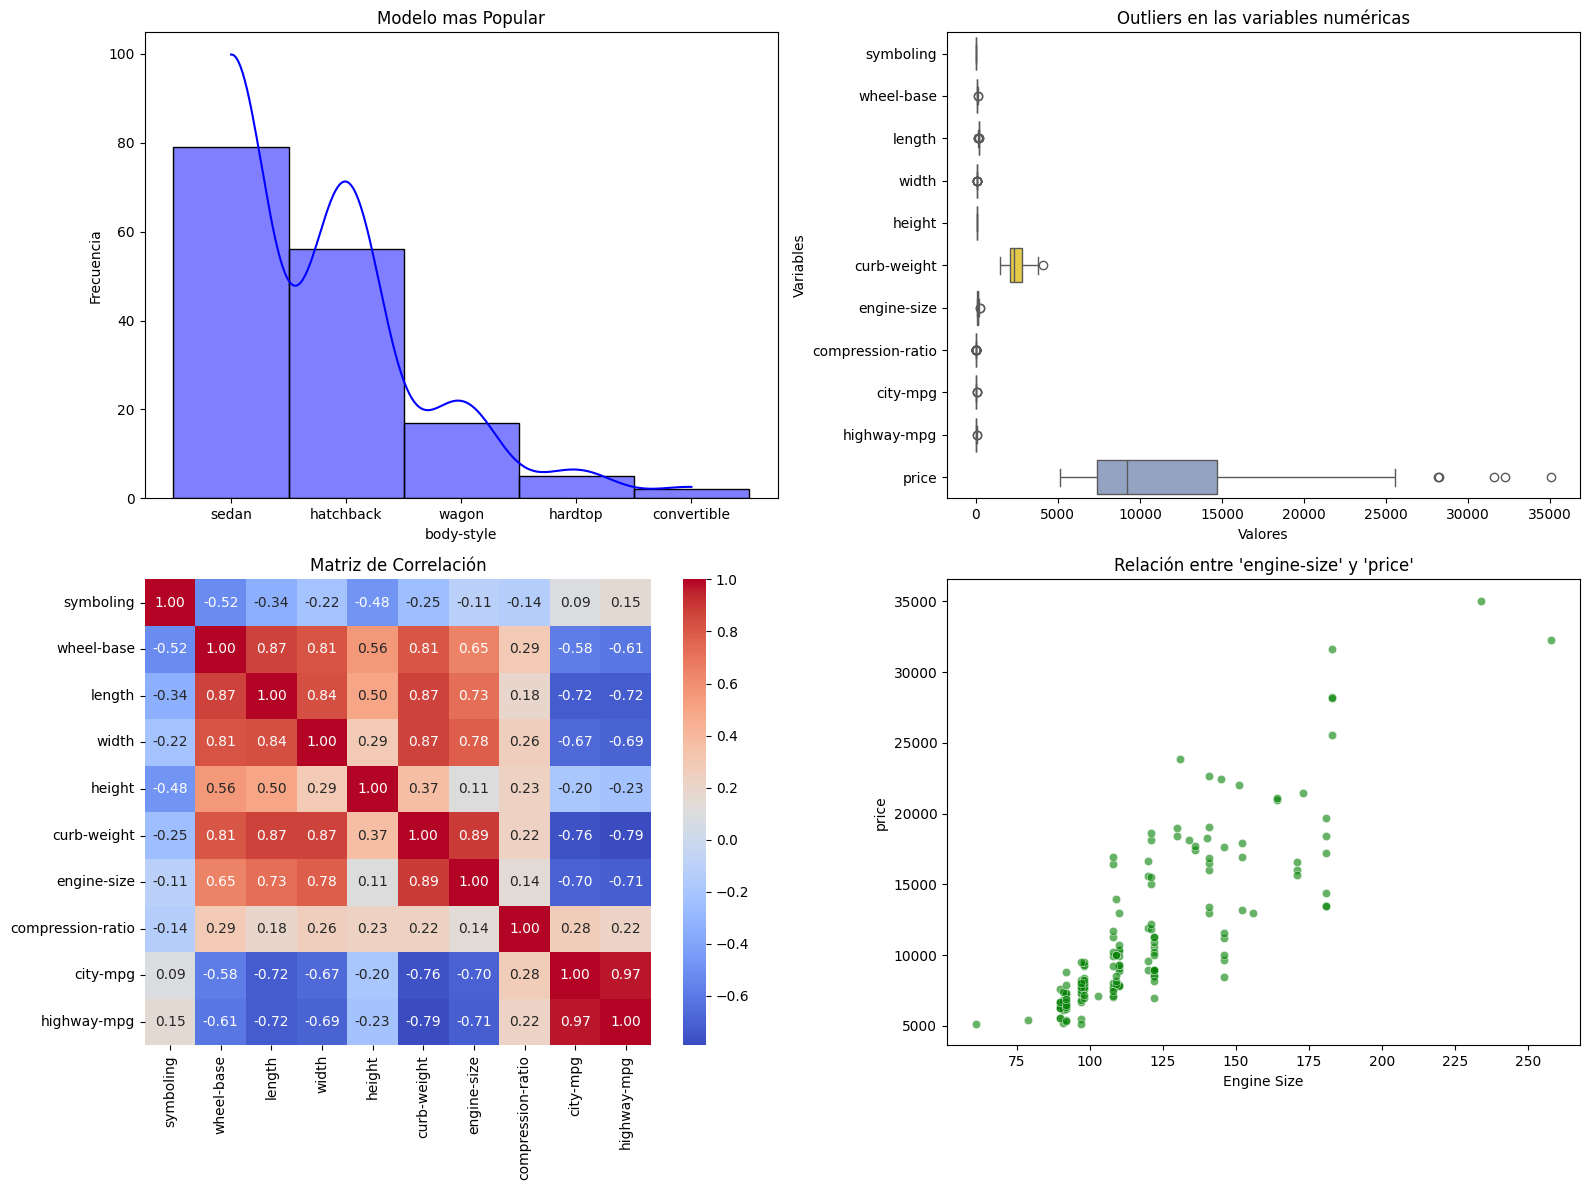

In [7]:

# Análisis Exploratorio del Dataset: 4 gráficos clave
plt.figure(figsize=(16, 12))

# Gráfico 1: Distribución de la variable objetivo 'price'
plt.subplot(2, 2, 1)
sns.histplot(df['body-style'], kde=True, color='blue', bins=30)
plt.title("Modelo mas Popular")
plt.xlabel("body-style")
plt.ylabel("Frecuencia")

# Gráfico 2: Boxplot para identificar outliers en las variables numéricas
plt.subplot(2, 2, 2)
sns.boxplot(data=df.select_dtypes(include=np.number), orient='h', palette='Set2')
plt.title("Outliers en las variables numéricas")
plt.xlabel("Valores")
plt.ylabel("Variables")

# Gráfico 3: Matriz de correlación
plt.subplot(2, 2, 3)
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Matriz de Correlación")

# Gráfico 4: Relación entre 'price' y una variable numérica significativa (ejemplo: 'engine-size')
if 'engine-size' in df.columns:  # Asegúrate de cambiarlo según las columnas de tu dataset
    plt.subplot(2, 2, 4)
    sns.scatterplot(x='engine-size', y='price', data=df, alpha=0.6, color='green')
    plt.title("Relación entre 'engine-size' y 'price'")
    plt.xlabel("Engine Size")
    plt.ylabel("price")

plt.tight_layout()
plt.show()

### Paso 3: Preprocesamiento de Datos
Aquí seleccionaremos las características importantes y transformaremos variables categóricas si existen.

In [9]:
# Mejora: Imputar valores nulos en lugar de eliminarlos
df.fillna(df.median(numeric_only=True), inplace=True)

# Eliminar columnas redundantes después de generar dummies
df = pd.get_dummies(df, drop_first=True)

# Detección y tratamiento de valores atípicos
from scipy.stats import zscore
df = df[(np.abs(zscore(df.select_dtypes(include=np.number))) < 3).all(axis=1)]

### Algoritmos

In [10]:
# Separación en características (X) y variable objetivo (y)
X = df.drop('price', axis=1)  # Asegúrate de usar el nombre correcto
y = df['price']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características (solo para modelos basados en distancias)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelos
models = {
    "Regresión Lineal": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Árbol de Decisión": DecisionTreeRegressor(random_state=42),
}

# Entrenamiento, predicción y evaluación
results = {}
for name, model in models.items():
    # Usar datos escalados solo si es KNN o Regresión Lineal
    if name in ["Regresión Lineal", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R²": r2}

# Mostrar resultados
print("\nResultados de los modelos:")
for name, metrics in results.items():
    print(f"{name} - MSE: {metrics['MSE']:.2f}, R²: {metrics['R²']:.2f}")


Resultados de los modelos:
Regresión Lineal - MSE: 1498610089997696186485403811840.00, R²: -59133899422001048584192.00
KNN - MSE: 11119556.03, R²: 0.56
Árbol de Decisión - MSE: 9174977.64, R²: 0.64


### Paso 6: Optimización y Ajuste de Hiperparámetros
Para optimizar KNN y el Árbol de Decisión, usamos GridSearchCV.

Mejor parámetro KNN: {'n_neighbors': 2}
Mejor parámetro Árbol de Decisión: {'max_depth': 5}


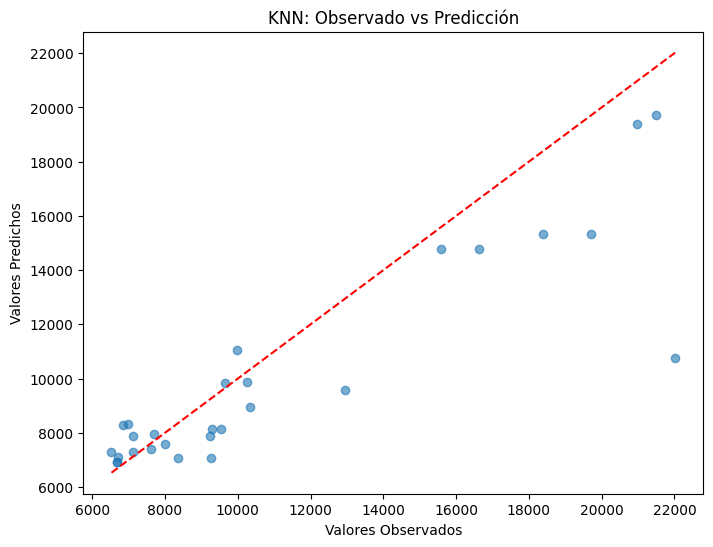

In [11]:
# GridSearchCV para optimizar KNN
knn_params = {'n_neighbors': range(1, 20)}
grid_knn = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='neg_mean_squared_error')
grid_knn.fit(X_train_scaled, y_train)
print(f"Mejor parámetro KNN: {grid_knn.best_params_}")

# GridSearchCV para Árbol de Decisión
tree_params = {'max_depth': range(1, 20)}
grid_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_params, cv=5, scoring='neg_mean_squared_error')
grid_tree.fit(X_train, y_train)
print(f"Mejor parámetro Árbol de Decisión: {grid_tree.best_params_}")

# Visualización: Comparación de predicciones vs reales (KNN como ejemplo)
best_knn = grid_knn.best_estimator_
y_pred_knn_best = best_knn.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores Observados")
plt.ylabel("Valores Predichos")
plt.title("KNN: Observado vs Predicción")
plt.show()
